In [1]:
import torch
import numpy as np
from torch.utils import data
from torch.nn import init
from matplotlib import pyplot as plt
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

In [2]:
#加载数据集
mnist_train = torchvision.datasets.FashionMNIST(root='~/Datasets/FashionMNIST', train=True,
download=True, transform=transforms.ToTensor())
mnist_test = torchvision.datasets.FashionMNIST(root='~/Datasets/FashionMNIST', train=False,
download=True, transform=transforms.ToTensor())

#定义模型参数
num_inputs, num_outputs, num_hiddens = 784, 10, 256

#定义计算测试集损失函数
def evaluate_loss(data_iter, net):
    l, n = 0.0, 0
    for X, y in data_iter:
        X = X.view((-1, num_inputs)) 
        l += loss(net(X),y).sum().item()
        n += y.shape[0]
    return l / n

#定义计算测试集准确率函数
def evaluate_accuracy(data_iter, net):
    acc_sum, n = 0.0, 0
    for X, y in data_iter:
        X = X.view((-1, num_inputs)) 
        acc_sum += (net(X).argmax(dim=1) == y).float().sum().item()
        n += y.shape[0]
    return acc_sum / n

#定义训练参数
batch_size, num_epochs, lr = 256, 30, 0.01

#定义损失函数
loss = torch.nn.CrossEntropyLoss()

#划分数据集
train_iter = torch.utils.data.DataLoader(mnist_train, batch_size=batch_size, shuffle=True,num_workers=0)
test_iter = torch.utils.data.DataLoader(mnist_test, batch_size=batch_size, shuffle=False,num_workers=0)

In [3]:
# ========== 一层隐藏层 ==========

class Onehidden_Classification(torch.nn.Module):
    def __init__(self):
        super(Onehidden_Classification, self).__init__()
        self.hidden = torch.nn.Linear(num_inputs, num_hiddens) #定义隐藏层函数
        self.relu = torch.nn.ReLU()                       #定义隐藏层激活函数
        self.output = torch.nn.Linear(num_hiddens, num_outputs)#定义输出层函数

    def forward(self, x):
        x = self.hidden(x)
        x = self.relu(x)
        x = self.output(x)
        return x

net_one = Onehidden_Classification()

#初始化模型参数
init.normal_(net_one.hidden.weight, mean=0, std=0.01)
init.normal_(net_one.output.weight, mean=0, std=0.01)
init.constant_(net_one.hidden.bias, val=0)
init.constant_(net_one.output.bias, val=0)

#定义优化器
optimizer = optim.SGD(net_one.parameters(), lr)

#训练模型
loss_train_one = []
loss_test_one = []
acc_train_one = []
acc_test_one = []
for epoch in range(num_epochs):
    train_l_sum, train_acc_sum, n = 0.0, 0.0, 0
    for X, y in train_iter:
        X = X.view((-1, num_inputs)) 
        y_hat = net_one(X)
        l = loss(y_hat,y).sum()   
        optimizer.zero_grad()
        l.backward()       #计算损失     
        optimizer.step()   #更新梯度
        train_l_sum += l.item()
        train_acc_sum += (y_hat.argmax(dim=1) == y).sum().item()
        n += y.shape[0]
    loss_train_one.append(train_l_sum/n)
    loss_test_one.append(evaluate_loss(test_iter,net_one))
    acc_train_one.append(train_acc_sum/n)
    acc_test_one.append(evaluate_accuracy(test_iter,net_one))
    print('epoch %d, loss_train %f, loss_test %f, acc_train %f, acc_test %f '% 
          (epoch+1, loss_train_one[epoch], loss_test_one[epoch], acc_train_one[epoch], acc_test_one[epoch]))

epoch 1, loss_train 0.008368, loss_test 0.007328, acc_train 0.464233, acc_test 0.499200 
epoch 2, loss_train 0.005850, loss_test 0.004992, acc_train 0.590300, acc_test 0.616000 
epoch 3, loss_train 0.004316, loss_test 0.004011, acc_train 0.644100, acc_test 0.642200 
epoch 4, loss_train 0.003629, loss_test 0.003540, acc_train 0.671467, acc_test 0.673700 
epoch 5, loss_train 0.003265, loss_test 0.003252, acc_train 0.692667, acc_test 0.692200 
epoch 6, loss_train 0.003040, loss_test 0.003065, acc_train 0.714717, acc_test 0.713000 
epoch 7, loss_train 0.002877, loss_test 0.002915, acc_train 0.734400, acc_test 0.732700 
epoch 8, loss_train 0.002744, loss_test 0.002795, acc_train 0.751117, acc_test 0.743900 
epoch 9, loss_train 0.002631, loss_test 0.002685, acc_train 0.764683, acc_test 0.759000 
epoch 10, loss_train 0.002531, loss_test 0.002591, acc_train 0.777033, acc_test 0.771300 
epoch 11, loss_train 0.002446, loss_test 0.002514, acc_train 0.786850, acc_test 0.777900 
epoch 12, loss_trai

In [4]:
# ========== 两层隐藏层 ==========

class Twohidden_Classification(torch.nn.Module):
    def __init__(self):
        super(Twohidden_Classification, self).__init__()
        self.hidden1 = torch.nn.Linear(num_inputs, num_hiddens) #定义隐藏层函数
        self.relu = torch.nn.ReLU()                       #定义隐藏层激活函数
        self.hidden2 = torch.nn.Linear(num_hiddens, num_hiddens) #定义隐藏层函数
        self.relu = torch.nn.ReLU()                       #定义隐藏层激活函数
        self.output = torch.nn.Linear(num_hiddens, num_outputs)#定义输出层函数

    def forward(self, x):
        x = self.hidden1(x)
        x = self.relu(x)
        x = self.hidden2(x)
        x = self.relu(x)
        x = self.output(x)
        return x

net_two = Twohidden_Classification()

#初始化模型参数
init.normal_(net_two.hidden1.weight, mean=0, std=0.01)
init.normal_(net_two.hidden2.weight, mean=0, std=0.01)
init.normal_(net_two.output.weight, mean=0, std=0.01)
init.constant_(net_two.hidden1.bias, val=0)
init.constant_(net_two.hidden2.bias, val=0)
init.constant_(net_two.output.bias, val=0)

#定义优化器
optimizer = optim.SGD(net_two.parameters(), lr)

#训练模型
loss_train_two = []
loss_test_two = []
acc_train_two = []
acc_test_two = []
for epoch in range(num_epochs):
    train_l_sum, train_acc_sum, n = 0.0, 0.0, 0
    for X, y in train_iter:
        X = X.view((-1, num_inputs)) 
        y_hat = net_two(X)
        l = loss(y_hat,y).sum()   
        optimizer.zero_grad()
        l.backward()       #计算损失     
        optimizer.step()   #更新梯度
        train_l_sum += l.item()
        train_acc_sum += (y_hat.argmax(dim=1) == y).sum().item()
        n += y.shape[0]
    loss_train_two.append(train_l_sum/n)
    loss_test_two.append(evaluate_loss(test_iter,net_two))
    acc_train_two.append(train_acc_sum/n)
    acc_test_two.append(evaluate_accuracy(test_iter,net_two))
    print('epoch %d, loss_train %f, loss_test %f, acc_train %f, acc_test %f '% 
          (epoch+1, loss_train_two[epoch], loss_test_two[epoch], acc_train_two[epoch], acc_test_two[epoch]))

epoch 1, loss_train 0.009011, loss_test 0.009195, acc_train 0.182333, acc_test 0.165700 
epoch 2, loss_train 0.008988, loss_test 0.009157, acc_train 0.199500, acc_test 0.220400 
epoch 3, loss_train 0.008897, loss_test 0.008955, acc_train 0.210017, acc_test 0.182300 
epoch 4, loss_train 0.008305, loss_test 0.007734, acc_train 0.217533, acc_test 0.293100 
epoch 5, loss_train 0.006565, loss_test 0.005889, acc_train 0.388217, acc_test 0.409100 
epoch 6, loss_train 0.005280, loss_test 0.005046, acc_train 0.459400, acc_test 0.487600 
epoch 7, loss_train 0.004633, loss_test 0.004517, acc_train 0.546767, acc_test 0.561700 
epoch 8, loss_train 0.004171, loss_test 0.004091, acc_train 0.599850, acc_test 0.599000 
epoch 9, loss_train 0.003782, loss_test 0.003762, acc_train 0.633333, acc_test 0.640400 
epoch 10, loss_train 0.003512, loss_test 0.003561, acc_train 0.658567, acc_test 0.643700 
epoch 11, loss_train 0.003342, loss_test 0.003396, acc_train 0.676533, acc_test 0.677000 
epoch 12, loss_trai

In [5]:
# ========== 三层隐藏层 ==========

class Thehidden_Classification(torch.nn.Module):
    def __init__(self):
        super(Thehidden_Classification, self).__init__()
        self.hidden1 = torch.nn.Linear(num_inputs, num_hiddens) #定义隐藏层函数
        self.relu = torch.nn.ReLU()                       #定义隐藏层激活函数
        self.hidden2 = torch.nn.Linear(num_hiddens, num_hiddens) #定义隐藏层函数
        self.relu = torch.nn.ReLU()                       #定义隐藏层激活函数
        self.hidden3 = torch.nn.Linear(num_hiddens, num_hiddens) #定义隐藏层函数
        self.relu = torch.nn.ReLU()                       #定义隐藏层激活函数
        self.output = torch.nn.Linear(num_hiddens, num_outputs)#定义输出层函数

    def forward(self, x):
        x = self.hidden1(x)
        x = self.relu(x)
        x = self.hidden2(x)
        x = self.relu(x)
        x = self.hidden3(x)
        x = self.relu(x)
        x = self.output(x)
        return x

net_thr = Thehidden_Classification()

#初始化模型参数
init.normal_(net_thr.hidden1.weight, mean=0, std=0.01)
init.normal_(net_thr.hidden2.weight, mean=0, std=0.01)
init.normal_(net_thr.hidden3.weight, mean=0, std=0.01)
init.normal_(net_thr.output.weight, mean=0, std=0.01)
init.constant_(net_thr.hidden1.bias, val=0)
init.constant_(net_thr.hidden2.bias, val=0)
init.constant_(net_thr.hidden3.bias, val=0)
init.constant_(net_thr.output.bias, val=0)

#定义优化器
optimizer = optim.SGD(net_thr.parameters(), lr)

#训练模型
loss_train_thr = []
loss_test_thr = []
acc_train_thr = []
acc_test_thr = []
for epoch in range(num_epochs):
    train_l_sum, train_acc_sum, n = 0.0, 0.0, 0
    for X, y in train_iter:
        X = X.view((-1, num_inputs)) 
        y_hat = net_thr(X)
        l = loss(y_hat,y).sum()   
        optimizer.zero_grad()
        l.backward()       #计算损失     
        optimizer.step()   #更新梯度
        train_l_sum += l.item()
        train_acc_sum += (y_hat.argmax(dim=1) == y).sum().item()
        n += y.shape[0]
    loss_train_thr.append(train_l_sum/n)
    loss_test_thr.append(evaluate_loss(test_iter,net_thr))
    acc_train_thr.append(train_acc_sum/n)
    acc_test_thr.append(evaluate_accuracy(test_iter,net_thr))
    print('epoch %d, loss_train %f, loss_test %f, acc_train %f, acc_test %f '% 
          (epoch+1, loss_train_thr[epoch], loss_test_thr[epoch], acc_train_thr[epoch], acc_test_thr[epoch]))

epoch 1, loss_train 0.009018, loss_test 0.009210, acc_train 0.104917, acc_test 0.265800 
epoch 2, loss_train 0.009018, loss_test 0.009210, acc_train 0.127267, acc_test 0.223700 
epoch 3, loss_train 0.009018, loss_test 0.009209, acc_train 0.126183, acc_test 0.107100 
epoch 4, loss_train 0.009017, loss_test 0.009209, acc_train 0.145200, acc_test 0.180800 
epoch 5, loss_train 0.009017, loss_test 0.009209, acc_train 0.169750, acc_test 0.326200 
epoch 6, loss_train 0.009017, loss_test 0.009209, acc_train 0.170600, acc_test 0.263400 
epoch 7, loss_train 0.009017, loss_test 0.009208, acc_train 0.190117, acc_test 0.257400 
epoch 8, loss_train 0.009016, loss_test 0.009208, acc_train 0.189000, acc_test 0.274500 
epoch 9, loss_train 0.009015, loss_test 0.009207, acc_train 0.227733, acc_test 0.327500 
epoch 10, loss_train 0.009015, loss_test 0.009206, acc_train 0.300967, acc_test 0.314900 
epoch 11, loss_train 0.009014, loss_test 0.009205, acc_train 0.218600, acc_test 0.366100 
epoch 12, loss_trai

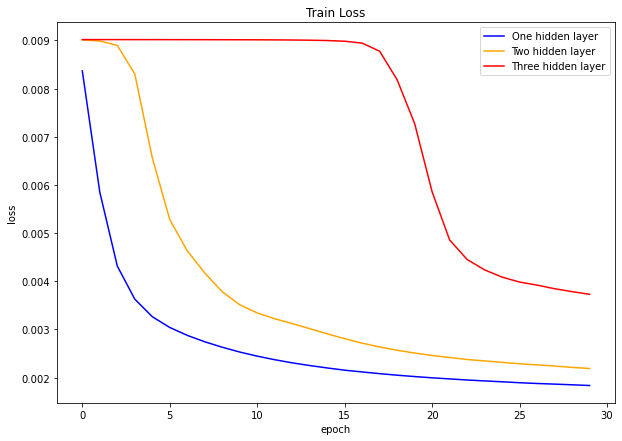

In [7]:
plt.figure(figsize=(10,7))
plt.plot(loss_train_one,label='One hidden layer',color='blue')
plt.plot(loss_train_two,label='Two hidden layer', color='orange')
plt.plot(loss_train_thr,label='Three hidden layer', color='red')
plt.ylabel("loss")
plt.xlabel("epoch")
plt.title("Train Loss")
plt.legend()
plt.show()

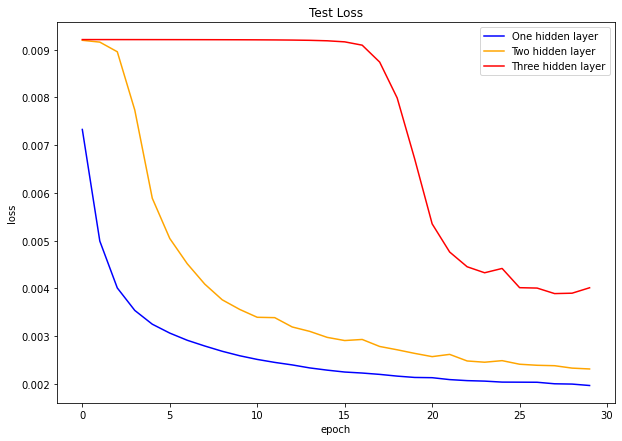

In [8]:
plt.figure(figsize=(10,7))
plt.plot(loss_test_one,label='One hidden layer',color='blue')
plt.plot(loss_test_two,label='Two hidden layer', color='orange')
plt.plot(loss_test_thr,label='Three hidden layer', color='red')
plt.ylabel("loss")
plt.xlabel("epoch")
plt.title("Test Loss")
plt.legend()
plt.show()

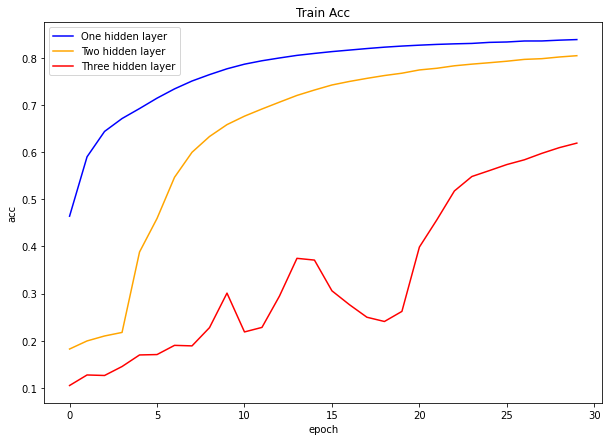

In [9]:
plt.figure(figsize=(10,7))
plt.plot(acc_train_one,label='One hidden layer',color='blue')
plt.plot(acc_train_two,label='Two hidden layer', color='orange')
plt.plot(acc_train_thr,label='Three hidden layer', color='red')
plt.ylabel("acc")
plt.xlabel("epoch")
plt.title("Train Acc")
plt.legend()
plt.show()

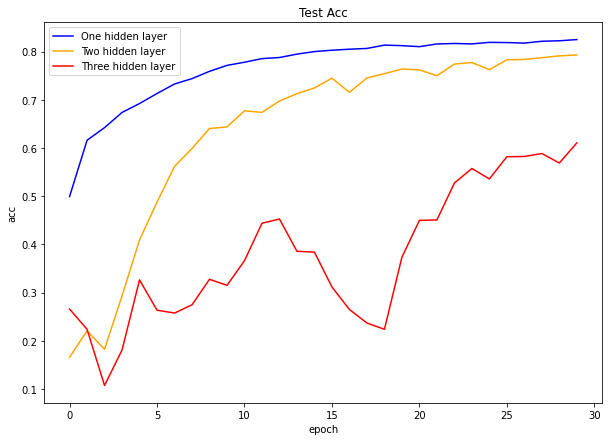

In [10]:
plt.figure(figsize=(10,7))
plt.plot(acc_test_one,label='One hidden layer',color='blue')
plt.plot(acc_test_two,label='Two hidden layer', color='orange')
plt.plot(acc_test_thr,label='Three hidden layer', color='red')
plt.ylabel("acc")
plt.xlabel("epoch")
plt.title("Test Acc")
plt.legend()
plt.show()